In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import pickle
import lzma
import matplotlib.pyplot as plt
import csv
import h5py
from tqdm import tqdm
sys.path.insert(0, os.path.abspath('/home/suryakalia/documents/summer/exploration/kasthurilab_connectomics/'))
# Need to add above path since VSCode Jupyter Notebook doesn't respect system's $PYTHONPATH variable
# This will be eliminated once my module is converted to a conda package and installed to the conda env

In [3]:
# with open( "/home/suryakalia/documents/summer/tests/cremi_A_analysis/metadata_cleft_overlap_volume.csv", newline='') as f:
with open( "/home/suryakalia/documents/summer/tests/hanyu_analysis/metadata_cleft_overlap_volume.csv", newline='') as f:
  reader = csv.reader(f)
  synapse_overlap_list = list(reader)[1:]

In [3]:
len(synapse_overlap_list)

491361

In [4]:
synapse_overlap_map = {}
synapse_volume_map = {}

for row in tqdm(synapse_overlap_list):
  neuron_pair = row[0]
  synapse_id = row[1]
  volume = int(row[8])
  if (volume == 0):
    continue
  
  if synapse_id in synapse_overlap_map:
    synapse_overlap_map[synapse_id].append(neuron_pair)
  else:
    synapse_overlap_map[synapse_id] = [neuron_pair]
  
  synapse_volume_map[synapse_id + "_" + neuron_pair] = volume

print(len(synapse_overlap_map))

100%|██████████| 491361/491361 [00:00<00:00, 2475948.23it/s]


689


In [5]:
synapse_overlap_map

{'636': ['1881841_6292032',
  '1881841_6293274',
  '1881841_6295495',
  '6292032_6293274',
  '6292032_6295495',
  '6292032_6299477'],
 '761': ['1881841_6287230',
  '1881841_6289759',
  '6287230_6289759',
  '6287230_6289388',
  '6289759_6289388'],
 '181': ['1881841_1893143',
  '1881841_2305188',
  '1881841_2310217',
  '1881841_2306864',
  '1893143_2305188',
  '1893143_2306864'],
 '206': ['1881841_1893143', '1881841_2301616', '1893143_2301616'],
 '205': ['1881841_1893143',
  '1881841_2300468',
  '1881841_2301616',
  '1893143_2301616'],
 '857': ['1881841_6294317', '1881841_6292255', '6294317_6292255'],
 '138': ['1881841_1881879',
  '1881841_1889067',
  '1881879_1889468',
  '1881879_1889067',
  '1889468_1889067'],
 '278': ['1881841_1891817',
  '1881841_1893173',
  '1881841_1892312',
  '1891656_1891817',
  '1891656_1893173',
  '1892719_1891817',
  '1892719_1893173',
  '1891817_1893173',
  '1891817_1892312',
  '1891817_1894306',
  '1893173_1892312'],
 '74': ['1881841_1889067'],
 '779': ['188

In [6]:
num_neighboring_pairs = {key:len(value) for key,value in synapse_overlap_map.items()}

In [7]:
print(len(num_neighboring_pairs))
print(num_neighboring_pairs)

689
{'636': 6, '761': 5, '181': 6, '206': 3, '205': 4, '857': 3, '138': 5, '278': 11, '74': 1, '779': 12, '927': 1, '856': 3, '854': 1, '855': 3, '268': 1, '360': 1, '332': 12, '351': 3, '931': 1, '424': 13, '84': 23, '141': 3, '121': 3, '251': 6, '397': 3, '494': 6, '651': 3, '664': 3, '412': 11, '224': 10, '190': 3, '130': 5, '45': 1, '189': 1, '1': 1, '396': 10, '485': 3, '801': 5, '791': 2, '831': 1, '844': 1, '702': 24, '564': 1, '565': 1, '832': 14, '232': 12, '369': 3, '78': 7, '811': 3, '668': 7, '139': 3, '274': 13, '354': 3, '285': 3, '297': 3, '576': 3, '577': 1, '777': 5, '325': 9, '556': 5, '643': 8, '521': 12, '725': 12, '732': 19, '740': 7, '841': 9, '488': 4, '339': 1, '365': 3, '423': 7, '546': 1, '231': 3, '399': 3, '90': 27, '30': 3, '52': 3, '300': 3, '289': 3, '267': 14, '57': 10, '104': 6, '394': 2, '71': 25, '49': 6, '676': 6, '100': 24, '3': 6, '237': 3, '211': 10, '319': 5, '429': 5, '172': 6, '16': 8, '474': 3, '574': 11, '207': 3, '191': 3, '182': 3, '444': 3

In [7]:
neighbor_count = np.array(list(num_neighboring_pairs.values()))

In [9]:
neighbor_count

array([ 6,  5,  6,  3,  4,  3,  5, 11,  1, 12,  1,  3,  1,  3,  1,  1, 12,
        3,  1, 13, 23,  3,  3,  6,  3,  6,  3,  3, 11, 10,  3,  5,  1,  1,
        1, 10,  3,  5,  2,  1,  1, 24,  1,  1, 14, 12,  3,  7,  3,  7,  3,
       13,  3,  3,  3,  3,  1,  5,  9,  5,  8, 12, 12, 19,  7,  9,  4,  1,
        3,  7,  1,  3,  3, 27,  3,  3,  3,  3, 14, 10,  6,  2, 25,  6,  6,
       24,  6,  3, 10,  5,  5,  6,  8,  3, 11,  3,  3,  3,  3,  3,  1,  2,
        6,  9, 16, 21, 13,  5,  5, 12,  4,  4,  7,  9,  3,  9,  5,  5,  1,
        5,  9,  8, 14, 18, 19, 16, 13,  1,  6,  7, 13,  9,  8, 36,  7,  7,
        6,  5, 10,  7,  3, 16,  2,  8, 16,  5, 12,  3, 14,  3,  5,  5,  1,
        2, 10,  8,  6, 24, 12,  1, 14,  1,  6,  7, 14,  2,  5,  8, 16, 14,
        1,  8, 13,  6,  3,  3,  3,  3,  5,  1, 28,  5,  1,  1,  3,  7,  1,
        1,  1,  3,  5, 11, 17,  8,  7,  7,  5,  3,  5,  3,  9,  5,  8, 29,
        7,  9,  3,  1,  6,  5, 18,  1,  9,  1,  8, 10, 18, 10,  9,  9, 15,
        9, 40, 31, 11,  8

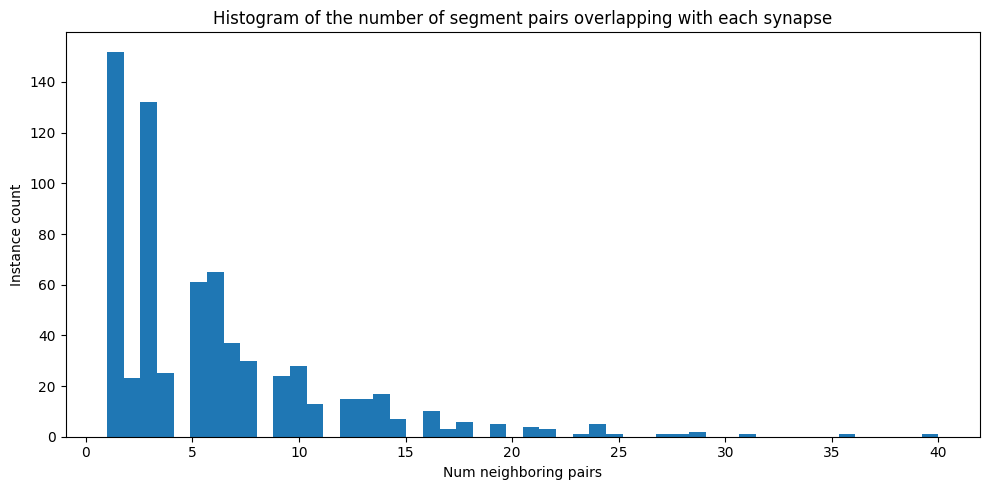

In [22]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
plt.hist(neighbor_count, bins=50)
plt.xlabel("Num neighboring pairs")
plt.ylabel("Instance count")
plt.title("Histogram of the number of segment pairs overlapping with each synapse")
plt.show() 

In [8]:
print(min(neighbor_count))
print(max(neighbor_count))


1
40


In [9]:
print([key for key, val in num_neighboring_pairs.items() if val == 40])

['447']


In [10]:
print(synapse_overlap_map['447'])

['6304426_6293727', '6304426_6307795', '6304426_6307607', '6293727_6303781', '6293727_6307795', '6293727_6307322', '6293727_6307607', '6293727_6311294', '6293727_6309418', '6293727_6311283', '6293727_6311493', '6293727_6311690', '6293727_6310903', '6293727_6311881', '6293727_6310495', '6303781_6307795', '6307795_6307322', '6307795_6307607', '6307795_6311294', '6307795_6309418', '6307795_6311283', '6307795_6311493', '6307795_6311690', '6307795_6309603', '6307795_6310903', '6307795_6311881', '6307795_6310495', '6307322_6307607', '6307322_6309418', '6307607_6309418', '6311294_6309418', '6311294_6311283', '6311294_6311493', '6311294_6311690', '6309418_6310903', '6311283_6311493', '6311283_6311690', '6311493_6310903', '6311493_6311881', '6310903_6310495']


In [11]:
# f = h5py.File("/home/suryakalia/documents/summer/datasets/cremi/sample_A_20160501.hdf", 'r')
f = h5py.File("/home/suryakalia/documents/summer/tests/hanyu_analysis/p105.h5", 'r')
clefts = np.array(f["volumes/labels/clefts"])

In [12]:
# f = h5py.File("/home/suryakalia/documents/summer/datasets/cremi/sample_A_20160501.hdf", 'r')
f = h5py.File("/home/suryakalia/documents/summer/tests/hanyu_analysis/p105.h5", 'r')
neuron_ids = np.array(f["volumes/labels/neuron_ids"])

In [26]:
print(neuron_ids[0,:,:])

[[1881841 1881841 1881841 ...       0       0       0]
 [1881841 1881841 1881841 ...       0       0       0]
 [1881841 1881841 1881841 ...       0       0       0]
 ...
 [2289281 2289281 2289281 ... 7323310 7323310 7323310]
 [2289281 2289281 2289281 ... 7323310 7323310 7323310]
 [2289281 2289281 2289281 ... 7323310 7323310 7323310]]


In [16]:
clipped_neuron_ids = np.where(neuron_ids == 6304426 , 1, 0)
clipped_clefts = np.where(clefts == 447, 1, 0)

(100,)
[  67  142  259  736  910  954  957  913  908  946  975  961  903  892
  942 1045 1208 1728 2305 2933 3425 4095 4653 5278 5421 5975 6071 5746
 5475 5247 4610 3610 2382 2206 2104 2251 2274 2006 1515 1329  923  750
  662  502  634  701  840 1010 1048  950  820  707  739  812  882 1029
  866  728  811 1092 1354 1682 1925 2242 2678 2965 3118 3147 3159 3125
 3136 3215 3330 3358 3557 3450 3426 3436 3273 3141 2763 2234 1830 1597
 1598 2116 2325 2550 2773 3029 3155 3304 3355 3406 3285 3067 2690 2342
 2064 1805]
26


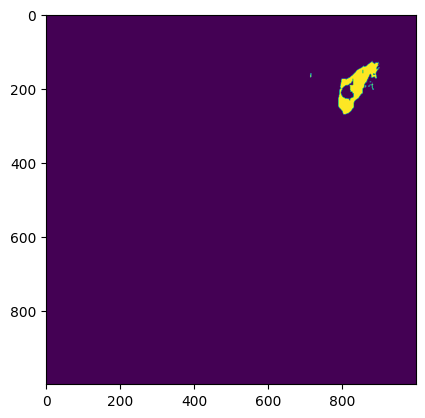

In [14]:
plt.imshow(clipped_neuron_ids[26 , :, :])
neuron_layer_sum = np.sum(clipped_neuron_ids, axis=(1,2))
print(neuron_layer_sum.shape)
print(neuron_layer_sum)
print(neuron_layer_sum.argmax())

(100,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 207 224 382 408
 404 393 311 401 286 287 298 229 216 186 138  63   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
53


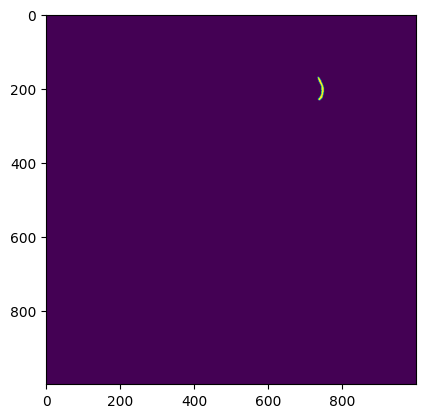

In [17]:
plt.imshow(clipped_clefts[53,:,:])
cleft_layer_sum = np.sum(clipped_clefts, axis=(1,2))
print(cleft_layer_sum.shape)
print(cleft_layer_sum)
print(cleft_layer_sum.argmax())

In [39]:
def get_unique_id_list(overlap_list):
  s = set()
  for pair_str in overlap_list:
    id_str_list = pair_str.split('_')
    for id_str in id_str_list:
      s.add(int(id_str))
  return s

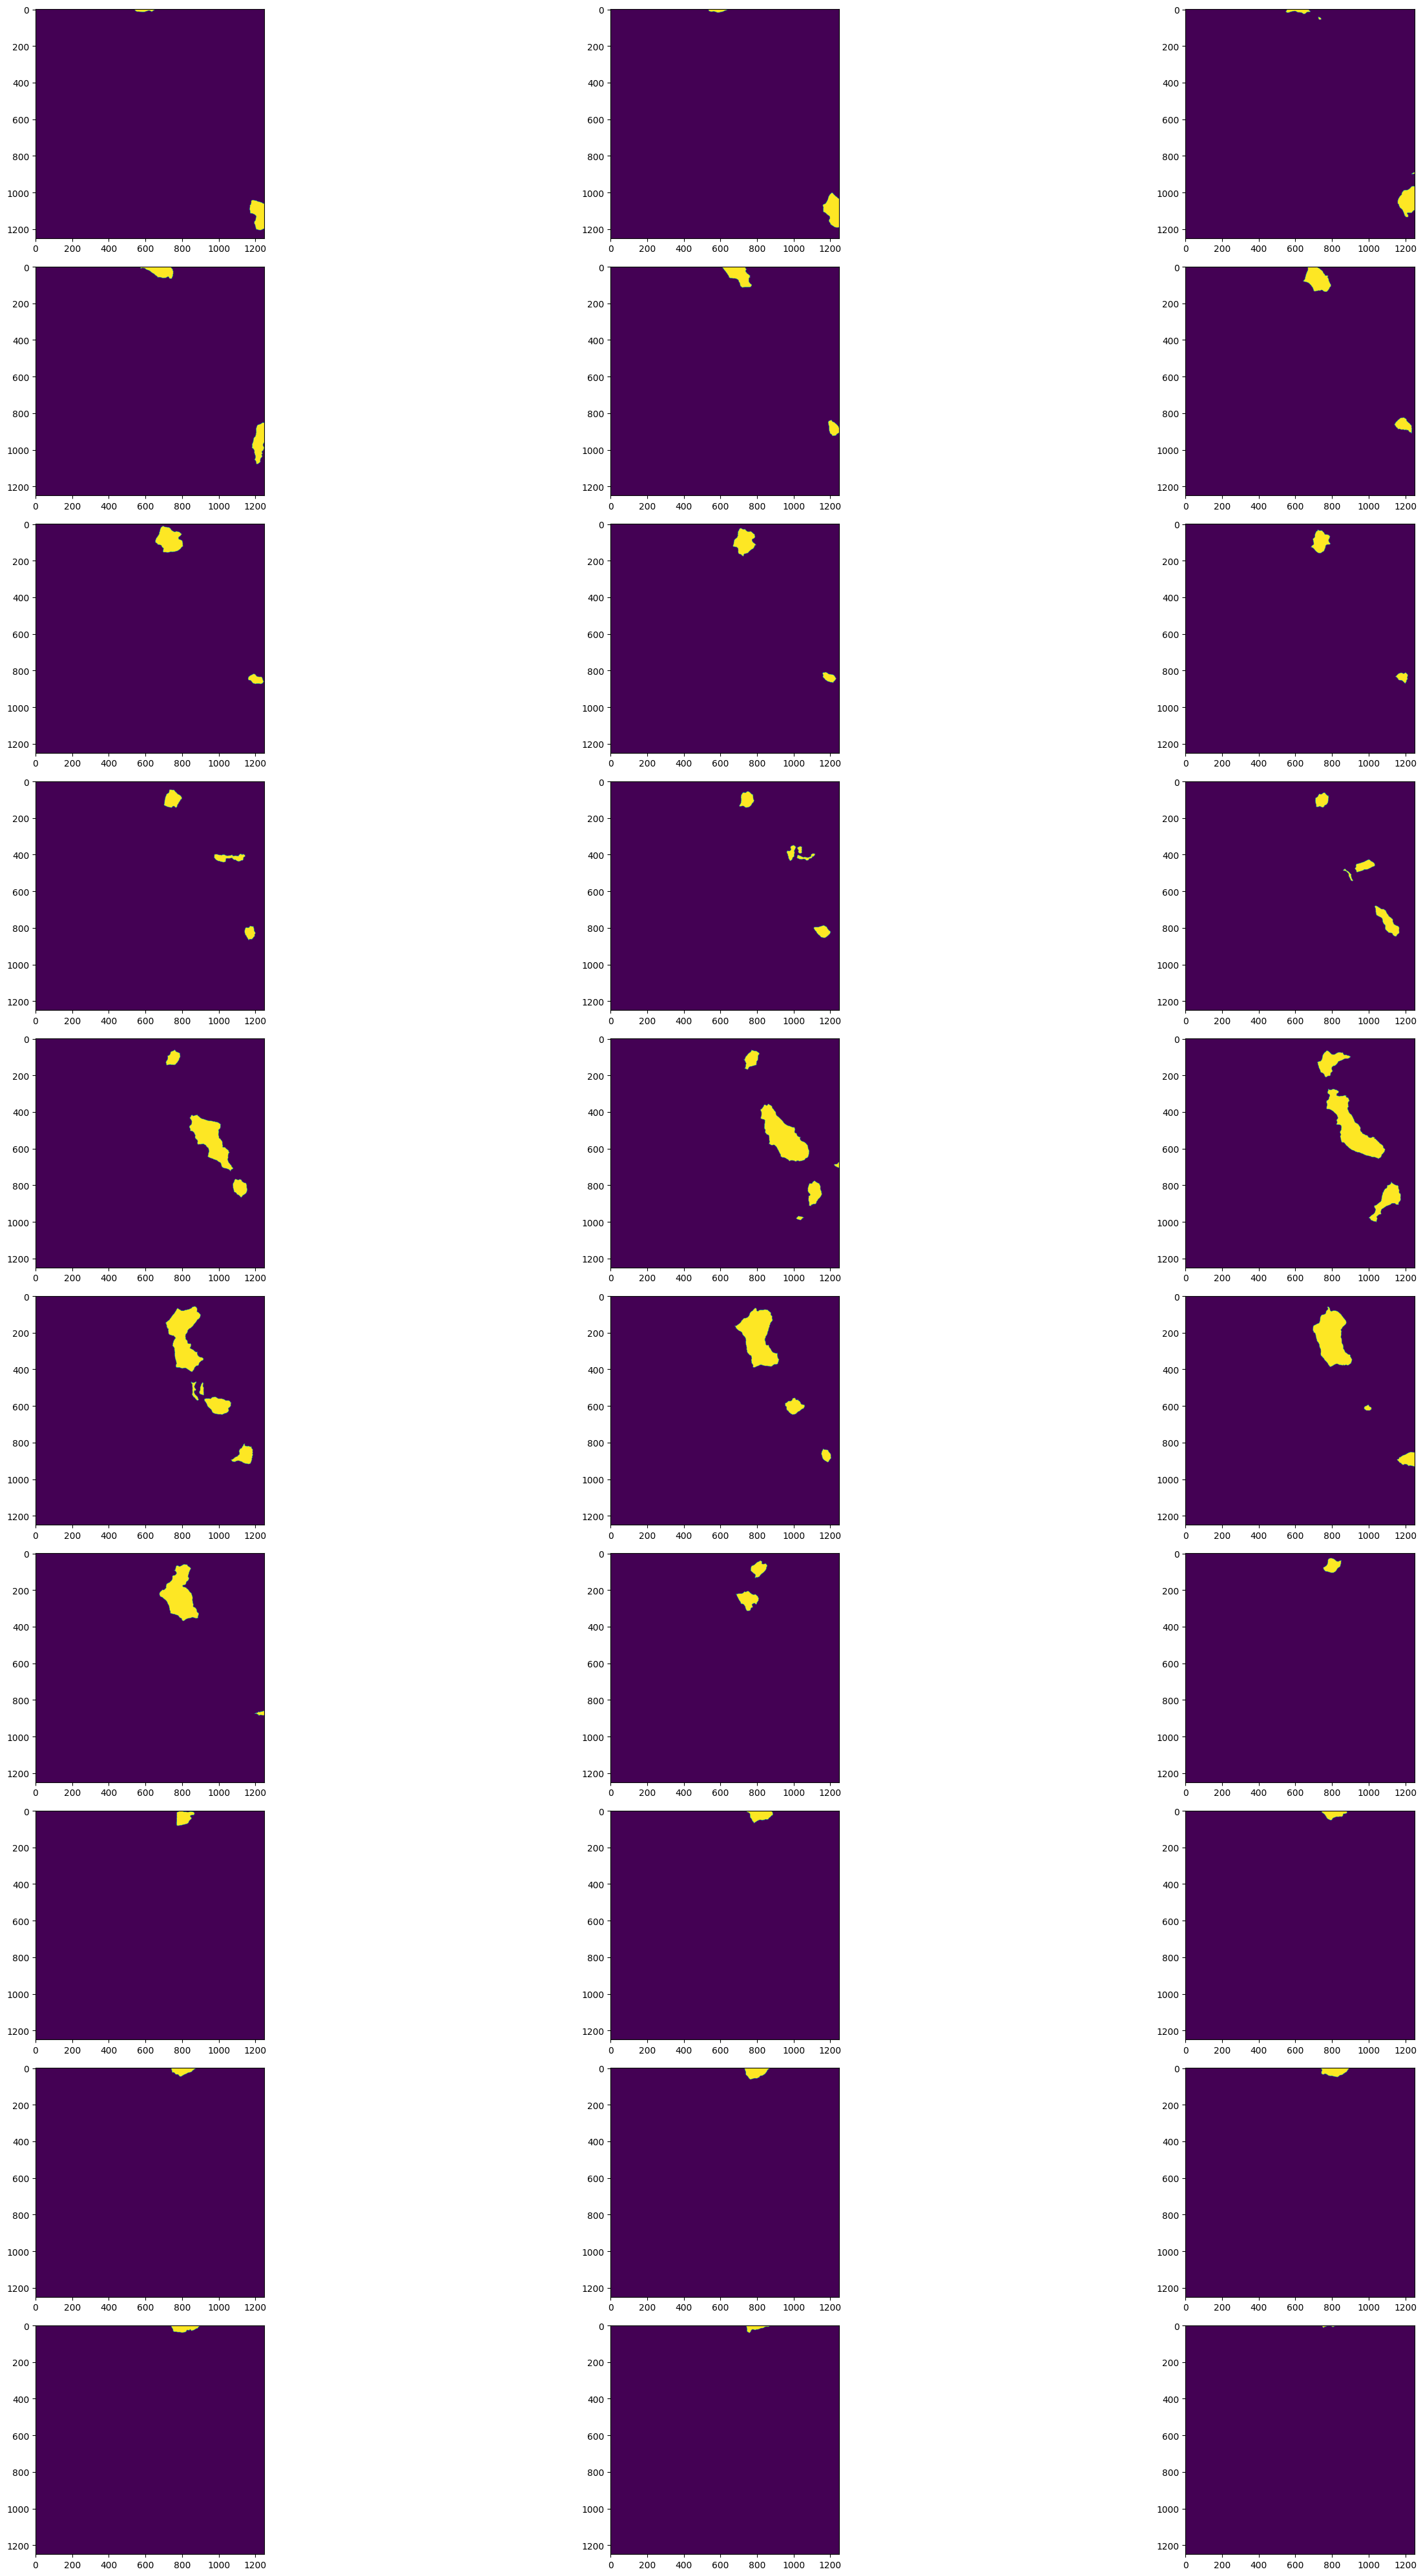

In [32]:
plt.rcParams["figure.figsize"] = [40, 40]
plt.rcParams["figure.autolayout"] = True
# f, axarr = f.add_subplot(10,1)
f.suptitle('Vertically stacked subplots')
for z in range(30):
  plt.subplot(10, 3, 1+z)
  plt.imshow(clipped_neuron_ids[z*4,:,:])
  # axarr[z].imshow(clipped_neuron_ids[z*10,:,:])

In [5]:
clipped_missing_clefts = np.where(clefts == 105, 1, 0)

In [6]:

missing_clefts_layer_sum = np.sum(clipped_missing_clefts, axis=(1,2))
print(missing_clefts_layer_sum.shape)
print(missing_clefts_layer_sum)
print(missing_clefts_layer_sum.argmax())

(100,)
[  0   0   0   0   0   0   0   0   0   0   5 171 163 130 138 184 126 139
  40  68   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
15


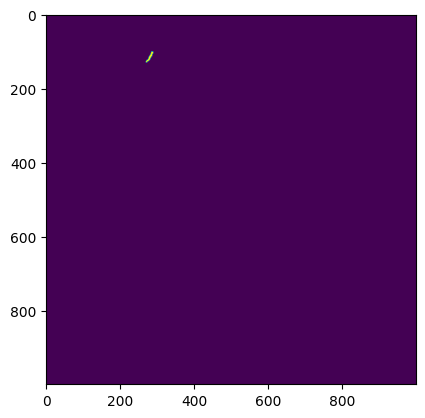

In [7]:
plt.imshow(clipped_missing_clefts[15,:,:])